In [1]:
import os
import json
import requests
import numpy as np
from io import BytesIO
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont

In [2]:
def draw(image_url, items):
    r = requests.get(image_url)
    im = Image.open(BytesIO(r.content))
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype('arial.ttf', 16, encoding='unic')
    for item in items:
        draw.rectangle([item['x'], 
                        item['y'], 
                        item['x'] + item['width'], 
                        item['y'] + item['height']], outline='#FF0000')
                        
        s = '{0} ({1:.0%})'.format(item['label'], item['confidence'])
        draw.text((item['x'], item['y']), 
                  s, 
                  font=font, fill=(0, 0, 0, 255))
    del draw
    return im

In [9]:
service = 'http://40.117.150.246:80/score'
image_url = 'https://media.bizarrepedia.com/images/timothy-treadwell.jpg'

In [10]:
r = requests.post(service, json={"image": image_url})   
response = json.loads(r.json())

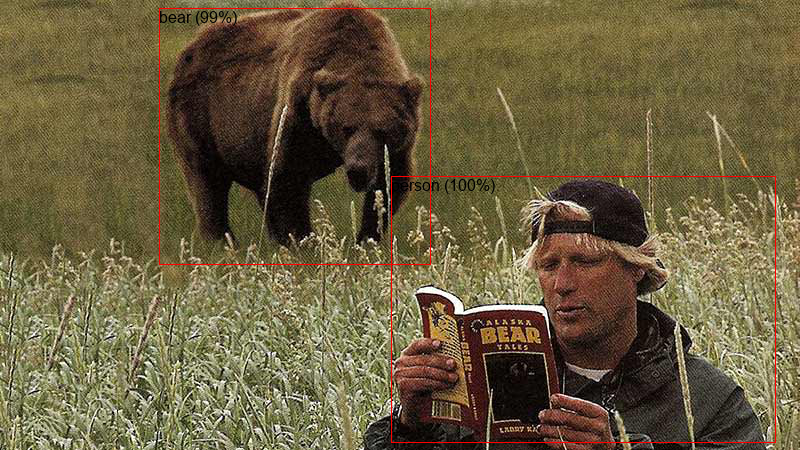

In [11]:
img = draw(image_url, response['predictions'])
display(img)